### Check GPU availability

In [14]:
import torch

torch.cuda.is_available()

True

### New Experiments

In [ ]:
import os
import numpy as np

subset_size = 10
sample_size = 10
sc_options = ['None', 'None', 'True', 'False'] * sample_size

for sc_choice in sc_options:
    os.system(f"python main.py -model 'googlenet' -b 4 -bs 64 -s 1.16 -ds 'CIFAR100' -sn {subset_size} -sc '{sc_choice}'")

### Get Experimental Results

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("../logs/Quantization_Log_googlenet_4bit.csv")

In [17]:
df

,Model Name,Dataset,Quantization Batch Size,Original Top1 Accuracy,Quantized Top1 Accuracy,Original Top5 Accuracy,Quantized Top5 Accuracy,Bits,MLP_Alphabet_Scalar,CNN_Alphabet_Scalar,...,Original Top1 Accuracy (Pick Sub),Original Top5 Accuracy (Pick Sub),Quantized Top1 Accuracy (Pick Sub),Quantized Top5 Accuracy (Pick Sub),Fine-Tuned Top1 Accuracy (Pick Sub),Fine-Tuned Top5 Accuracy (Pick Sub),Quant+FT Top1 Accuracy (Pick Sub),Quant+FT Top5 Accuracy (Pick Sub),Fine-Tuned Sparsity,Quant+FT Sparsity
0,googlenet,CIFAR100,64,0.802,0.869,0.946,0.968,4,1.16,1.16,...,0.937,0.995,0.923,0.992,0.916,0.996,0.907,0.992,0.0,0.3513
1,googlenet,CIFAR100,64,0.773,0.846,0.941,0.963,4,1.16,1.16,...,0.939,0.994,0.925,0.998,0.922,0.998,0.909,0.995,0.0,0.3515
2,googlenet,CIFAR100,64,0.796,0.794,0.984,0.990,4,1.16,1.16,...,0.834,0.999,0.810,0.999,0.816,0.993,0.812,0.992,0.0,0.3516
3,googlenet,CIFAR100,64,0.840,0.919,0.976,0.985,4,1.16,1.16,...,0.982,1.000,0.970,0.998,0.982,0.999,0.975,0.999,0.0,0.3553
4,googlenet,CIFAR100,64,0.743,0.824,0.925,0.942,4,1.16,1.16,...,0.914,0.994,0.895,0.990,0.902,0.994,0.883,0.989,0.0,0.3512
5,googlenet,CIFAR100,64,0.741,0.841,0.921,0.941,4,1.16,1.16,...,0.935,0.996,0.912,0.995,0.922,0.996,0.905,0.991,0.0,0.3520
6,googlenet,CIFAR100,64,0.703,0.730,0.881,0.893,4,1.16,1.16,...,0.775,0.966,0.746,0.950,0.768,0.963,0.731,0.957,0.0,0.3566
7,googlenet,CIFAR100,64,0.853,0.909,0.974,0.990,4,1.16,1.16,...,0.977,1.000,0.968,0.998,0.973,1.000,0.966,0.999,0.0,0.3511
8,googlenet,CIFAR100,64,0.719,0.817,0.948,0.962,4,1.16,1.16,...,0.921,1.000,0.904,0.996,0.905,1.000,0.889,0.995,0.0,0.3521
9,googlenet,CIFAR100,64,0.707,0.774,0.902,0.927,4,1.16,1.16,...,0.869,0.990,0.836,0.987,0.864,0.991,0.834,0.986,0.0,0.3531


### Plot Results (Avg)

/opt/conda/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/tmp/ipykernel_212/1749608576.py:12: RuntimeWarning: divide by zero encountered in log
  return (a * np.log(b * x)) + c


Plots created successfully!


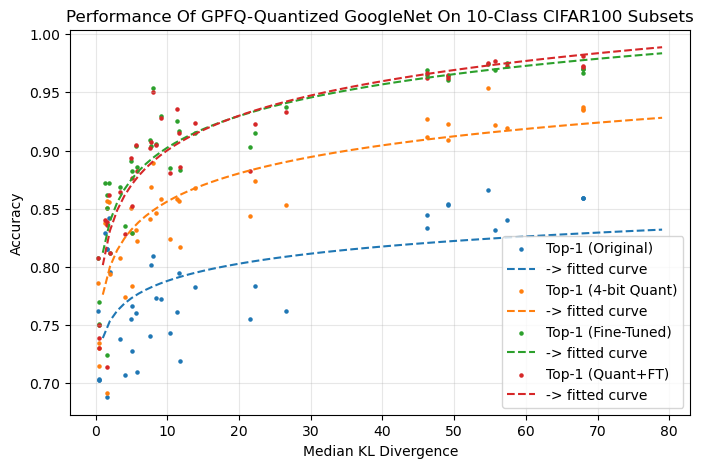

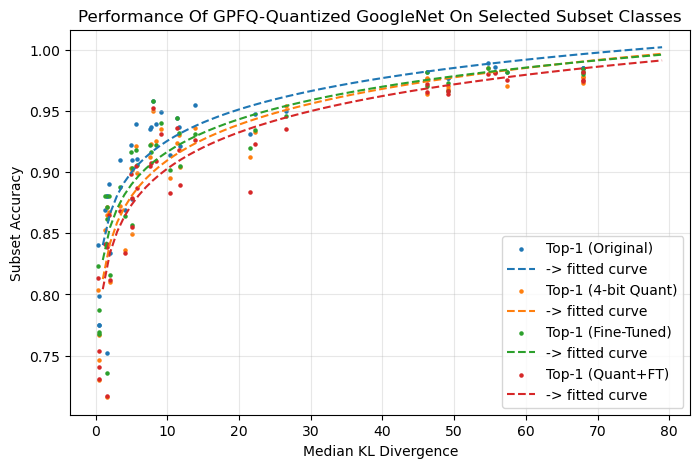

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
import os

# Path to the log CSV file
log_file = '../logs/Quantization_Log_googlenet_4bit.csv'

# Define the curve fitting function (logarithmic)
def func(x, a, b, c):
    return (a * np.log(b * x)) + c

# Check if the file exists
if not os.path.exists(log_file):
    print(f"Log file {log_file} not found. Please enter the correct path.")
else:
    # Read the CSV file
    df = pd.read_csv(log_file)
    
    # Make sure we have data
    if len(df) > 0:
        # First plot - Full dataset accuracy
        plt.figure(figsize=(8, 5))
        
        # Add grid
        plt.grid(True, alpha=0.3)
        
        # Original accuracy
        X, y = df["Median_KL"], df["Original Top1 Accuracy"]
        try:
            coefs, pcov = curve_fit(func, X, y)
            fitted_line_1 = []
            for i in range(80):
                fitted_line_1 += [func(i, *coefs).item()]
            
            plt.scatter(df["Median_KL"], df["Original Top1 Accuracy"], s=5)
            plt.plot(range(len(fitted_line_1)), fitted_line_1, '--')
        except Exception as e:
            print(f"Error fitting curve for Original Top1 Accuracy: {e}")
        
        # Quantized accuracy
        X, y = df["Median_KL"], df["Quantized Top1 Accuracy"]
        try:
            coefs, pcov = curve_fit(func, X, y)
            fitted_line_2 = []
            for i in range(80):
                fitted_line_2 += [func(i, *coefs).item()]
            
            plt.scatter(df["Median_KL"], df["Quantized Top1 Accuracy"], s=5)
            plt.plot(range(len(fitted_line_2)), fitted_line_2, '--')
        except Exception as e:
            print(f"Error fitting curve for Quantized Top1 Accuracy: {e}")
        
        # Fine-tuned accuracy
        X, y = df["Median_KL"], df["Fine-Tuned Top1 Accuracy"]
        try:
            coefs, pcov = curve_fit(func, X, y)
            fitted_line_3 = []
            for i in range(80):
                fitted_line_3 += [func(i, *coefs).item()]
            
            plt.scatter(df["Median_KL"], df["Fine-Tuned Top1 Accuracy"], s=5)
            plt.plot(range(len(fitted_line_3)), fitted_line_3, '--')
        except Exception as e:
            print(f"Error fitting curve for Fine-Tuned Top1 Accuracy: {e}")
        
        # Quant+FT accuracy
        X, y = df["Median_KL"], df["Quant+FT Top1 Accuracy"]
        try:
            coefs, pcov = curve_fit(func, X, y)
            fitted_line_4 = []
            for i in range(80):
                fitted_line_4 += [func(i, *coefs).item()]
            
            plt.scatter(df["Median_KL"], df["Quant+FT Top1 Accuracy"], s=5)
            plt.plot(range(len(fitted_line_4)), fitted_line_4, '--')
        except Exception as e:
            print(f"Error fitting curve for Quant+FT Top1 Accuracy: {e}")
        
        plt.xlabel("Median KL Divergence")
        plt.ylabel("Accuracy")
        plt.title("Performance Of GPFQ-Quantized GoogleNet On 10-Class CIFAR100 Subsets", fontsize=12)
        leg = plt.legend([
            "Top-1 (Original)", "-> fitted curve",
            "Top-1 (4-bit Quant)", "-> fitted curve",
            "Top-1 (Fine-Tuned)", "-> fitted curve",
            "Top-1 (Quant+FT)", "-> fitted curve"
        ])
        plt.savefig("googlenet_median_full.png")
        
        # Second plot - Subset accuracy
        plt.figure(figsize=(8, 5))
        
        # Add grid
        plt.grid(True, alpha=0.3)
        
        # Original subset accuracy
        X, y = df["Median_KL"], df["Original Top1 Accuracy (Pick Sub)"]
        try:
            coefs, pcov = curve_fit(func, X, y)
            fitted_line_1 = []
            for i in range(80):
                fitted_line_1 += [func(i, *coefs).item()]
            
            plt.scatter(df["Median_KL"], df["Original Top1 Accuracy (Pick Sub)"], s=5)
            plt.plot(range(len(fitted_line_1)), fitted_line_1, '--')
        except Exception as e:
            print(f"Error fitting curve for Original Top1 Accuracy (Pick Sub): {e}")
        
        # Quantized subset accuracy
        X, y = df["Median_KL"], df["Quantized Top1 Accuracy (Pick Sub)"]
        try:
            coefs, pcov = curve_fit(func, X, y)
            fitted_line_2 = []
            for i in range(80):
                fitted_line_2 += [func(i, *coefs).item()]
            
            plt.scatter(df["Median_KL"], df["Quantized Top1 Accuracy (Pick Sub)"], s=5)
            plt.plot(range(len(fitted_line_2)), fitted_line_2, '--')
        except Exception as e:
            print(f"Error fitting curve for Quantized Top1 Accuracy (Pick Sub): {e}")
        
        # Fine-tuned subset accuracy
        X, y = df["Median_KL"], df["Fine-Tuned Top1 Accuracy (Pick Sub)"]
        try:
            coefs, pcov = curve_fit(func, X, y)
            fitted_line_3 = []
            for i in range(80):
                fitted_line_3 += [func(i, *coefs).item()]
            
            plt.scatter(df["Median_KL"], df["Fine-Tuned Top1 Accuracy (Pick Sub)"], s=5)
            plt.plot(range(len(fitted_line_3)), fitted_line_3, '--')
        except Exception as e:
            print(f"Error fitting curve for Fine-Tuned Top1 Accuracy (Pick Sub): {e}")
        
        # Quant+FT subset accuracy
        X, y = df["Median_KL"], df["Quant+FT Top1 Accuracy (Pick Sub)"]
        try:
            coefs, pcov = curve_fit(func, X, y)
            fitted_line_4 = []
            for i in range(80):
                fitted_line_4 += [func(i, *coefs).item()]
            
            plt.scatter(df["Median_KL"], df["Quant+FT Top1 Accuracy (Pick Sub)"], s=5)
            plt.plot(range(len(fitted_line_4)), fitted_line_4, '--')
        except Exception as e:
            print(f"Error fitting curve for Quant+FT Top1 Accuracy (Pick Sub): {e}")
        
        plt.xlabel("Median KL Divergence")
        plt.ylabel("Subset Accuracy")
        plt.title("Performance Of GPFQ-Quantized GoogleNet On Selected Subset Classes", fontsize=12)
        leg = plt.legend([
            "Top-1 (Original)", "-> fitted curve",
            "Top-1 (4-bit Quant)", "-> fitted curve",
            "Top-1 (Fine-Tuned)", "-> fitted curve",
            "Top-1 (Quant+FT)", "-> fitted curve"
        ])
        plt.savefig("googlenet_median_subset.png")
        
        print("Plots created successfully!")
    else:
        print("No data found in the log file.")